In [1]:
## Importing required Libraries
import os
import tensorflow as tf
from tensorboard.plugins import projector
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sb

In [2]:
df = pd.read_csv("Journey_Clusters_5.csv")

#df=df.drop(columns=['clusterID'])
df=df.drop(df.columns[0], axis=1)
df.head()

,user_id,product_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Purchase,clusterID
0,586731299,5802440,2,2,22192.0,2.16,2.16,1,0,0,...,1,1,0,0,0,0,0,0,1,1
1,569852676,4938,2,1,499.0,1.43,1.43,1,0,0,...,0,0,0,0,1,0,0,0,1,1
2,448826103,5814048,3,2,7226454.0,6.27,5.95,2,0,0,...,0,0,0,0,0,0,0,1,1,3
3,448826103,5814047,2,1,1381.0,6.27,6.27,1,0,0,...,0,0,0,0,0,0,0,1,1,1
4,448826103,5787041,5,1,374.0,9.52,9.52,4,0,0,...,0,0,0,0,0,0,0,1,1,1


In [3]:
#df=df.drop(columns=['clusterID'])
df=df.drop(['user_id','product_id'], axis=1)
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Purchase,clusterID
5522901,2,1,298.0,10.79,10.79,0,2,0,0,4,...,0,1,0,0,0,0,0,0,0,1
6726839,1,1,0.0,3.97,3.97,0,0,1,8,0,...,0,0,1,0,0,0,0,0,0,1
8498618,3,1,1425.0,1.59,1.59,1,1,1,18,12,...,0,0,0,0,0,1,0,0,0,1
7226485,1,1,0.0,1.59,1.59,0,1,0,14,98,...,1,1,0,0,0,0,0,0,0,1
9555803,1,1,0.0,19.37,19.37,0,1,0,0,22,...,0,0,0,1,0,0,0,0,0,1


In [4]:
# Next, to analyze composition of each cluster

In [5]:
column_values = df["clusterID"]. values. ravel()
unique_values_a = np.array(pd.unique(column_values))
unique_values=np.sort(unique_values_a)
print(unique_values)


[0 1 2 3 4]


In [6]:
purchase_percentage=np.zeros(np.shape(unique_values))
representation_percentage=np.zeros(np.shape(unique_values))
for index, item in enumerate(unique_values):
    locations=df.loc[df['clusterID'] == item]
    purchase=locations.loc[locations['Purchase']==1]
    print('Number of records in cluster', item, '=', locations.shape[0])
    representation_percentage[index]=round((locations.shape[0]/df.shape[0])*100,2)
    purchase_percentage[index]=round((purchase.shape[0]/locations.shape[0])*100,2)
    
    

Number of records in cluster 0 = 222715
Number of records in cluster 1 = 9261877
Number of records in cluster 2 = 62673
Number of records in cluster 3 = 118332
Number of records in cluster 4 = 490603


[ 2.19 91.19  0.62  1.17  4.83]
[19.45 11.14 32.91 22.84 21.01]


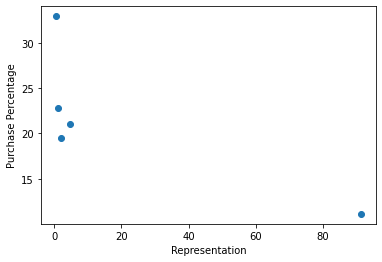

In [7]:
print((representation_percentage))
print(purchase_percentage)
import matplotlib.pyplot as plt
plt.scatter(representation_percentage,purchase_percentage)
plt.xlabel('Representation')
plt.ylabel('Purchase Percentage')
plt.show()

In [8]:
print(np.sum(purchase_percentage))

107.35000000000001


In [9]:
total_purchase=df.loc[df['Purchase']==1]

In [10]:
purchase_distrib=total_purchase.shape[0]/df.shape[0]
print(purchase_distrib*100)

12.06919910990331


In [11]:
#subsample each cluster to 20% as df_sub and then analyz
data=[]
df_sub = pd.DataFrame(data, columns=(df.columns.values[0:34]))

for index, item in enumerate(unique_values):
    locations=df.loc[df['clusterID'] == item]
    ret_size=np.round(0.2*locations.shape[0]).astype(int)
    print(ret_size)
    rows=np.random.permutation(ret_size)
    loc_data=locations.iloc[rows,:]
    #print(loc_data.iloc[0:5,0:34])
    df_sub=df_sub.append(loc_data)
print(df_sub.shape[0])

44543
1852375
12535
23666
98121
2031240


In [12]:
#Thus, cluster 0 is closest to average purchase ratio

In [13]:
#1. Lets find distances between clusters. Start with calinski-harabasz

In [14]:
X=np.array(df_sub[df_sub.columns[0:10]])
#X=np.array(df[df.columns[0:13]])
#Normalize X to aid compute
#X_n = (X-X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0))
Y=np.array(df_sub[df_sub.columns[34]])
#################################
#X=X[0:30000,:]
#Y=Y[0:30000]
#############################
pca = PCA(n_components=5)
pca.fit(X)
X1=pca.transform(X)

print(np.shape(X1))
#start with 2 clusters to 5 and show CH score increases as clusters increase

(2031240, 5)


In [15]:
X1_n = (X1-X1.min(axis=0)) / (X1.max(axis=0)-X1.min(axis=0))
X1=X1_n
print(X1[0:5,:])

[[0.29161495 0.03614097 0.24770274 0.03489584 0.03035445]
 [0.16678769 0.00813152 0.20132433 0.01960142 0.026947  ]
 [0.21294186 0.00785099 0.19970435 0.02152995 0.03442783]
 [0.26988196 0.00713144 0.20175255 0.02134269 0.02433946]
 [0.18995687 0.00857453 0.2018418  0.02076663 0.02633261]]


In [16]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

c_vals=[4,0,3,2]
locs=np.array([])
locations=np.where(Y==1)
locs=np.append(locs,locations).astype(int)
CH=[]
SS=[]
#To locate the cluster indices
for index, item in enumerate(c_vals):
    locations=np.where(Y==item)
    locs=np.append(locs,locations).astype(int)
    print(item)
    m=metrics.calinski_harabasz_score(X1[locs,:], Y[locs])
    #m=m/len(locs)
    CH.append(m)
    #SS.append(metrics.silhouette_score(X1[locs,:], Y[locs]))
    #print(metrics.calinski_harabasz_score(X[locs,:], Y[locs]))
    
print(CH)
print(SS)

4
0
3
2
[163785.45937582507, 315319.7171483054, 496380.78007471643, 664824.2579838119]
[]


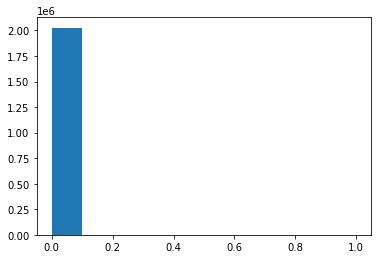

In [17]:
CH1=np.true_divide(CH,10**3)
#plt.plot([2,3,4,5],CH1)
#plt.plot([2,3,4,5],SS)
#plt.hist(X1[:,0],bins=100)
plt.hist(X1[:,1],bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

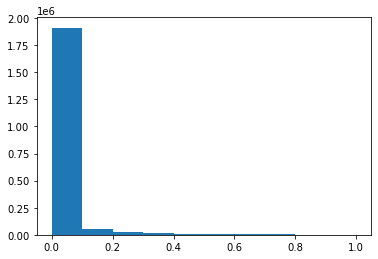

In [18]:
plt.hist(X1[:,0],bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
#plt.plot(range(len(X1[:,0])),X1[:,0])
plt.show()
# Thirdcomponent has similar histogram. Top two are relevant

In [19]:
#3. To find EMD between clusters
from scipy.stats import wasserstein_distance

#Step 1: find the histogram between clusters
def get_histogram(X):
    '''
    X=[nxd]
    '''
    r, c = np.shape(X)
    hist = [0.0] * 100001
    X=(100000*X).astype(int)
    
    for i in range(r):
        for j in range(c):
            hist[X[i,j]] += 1
    return np.array(hist) / (r * c)

#Step 2: Compute EMD per pairwise cluster combinations
c_vals=[1,4,0,3,2] #These are the cluster names
dist=np.zeros((5,5))
for i in c_vals:
    for j in c_vals:
     loci=np.where(Y==i)
     locj=np.where(Y==j)
     a = np.squeeze(X1[loci,:])
     b = np.squeeze(X1[locj,:])
     a_hist = get_histogram(a)
     b_hist = get_histogram(b)
     dist[i,j] = wasserstein_distance(a_hist, b_hist)
dist=10**6*dist

In [20]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='EMD',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('User Cluster')
    plt.xlabel('User Cluster')
    plt.show()


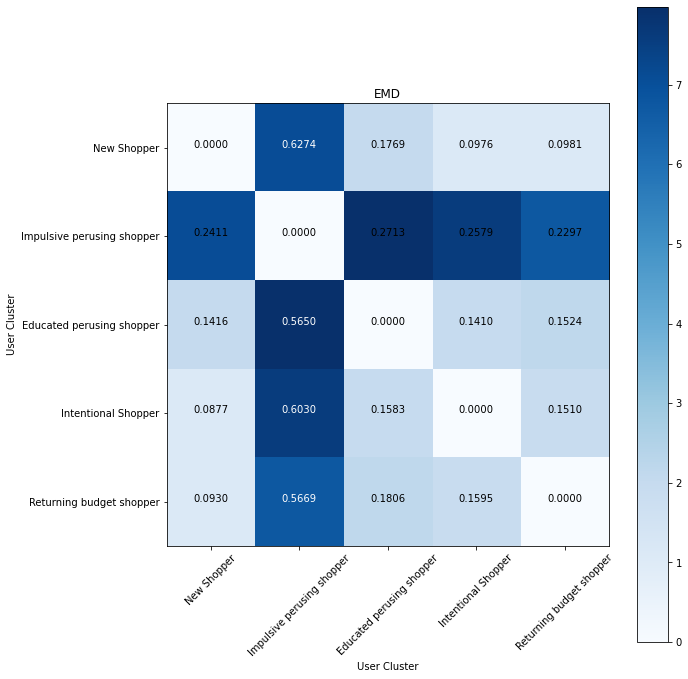

In [21]:
labs=['New Shopper','Impulsive perusing shopper','Educated perusing shopper','Intentional Shopper','Returning budget shopper']
#disp = ConfusionMatrixDisplay(confusion_matrix=dist,display_labels=labs)
#disp.plot()
plot_confusion_matrix(dist,labs)

In [22]:
r,c=np.shape(X1)